In [1]:
import math 
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Math
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta

In [2]:
w = sp.symbols('w')
A = sp.Matrix([[0, 2*w, w**2, 0],
              [-2*w, 0, 0, w**2],
              [1, 0, 0, 0],
              [0, 1, 0, 0]])
A

Matrix([
[   0, 2*w, w**2,    0],
[-2*w,   0,    0, w**2],
[   1,   0,    0,    0],
[   0,   1,    0,    0]])

In [3]:
a = A.eigenvects()

In [4]:
a #Each eigenvector has a multiplicity of 2

[(-I*w,
  2,
  [Matrix([
   [   w],
   [-I*w],
   [   I],
   [   1]])]),
 (I*w,
  2,
  [Matrix([
   [  w],
   [I*w],
   [ -I],
   [  1]])])]

In [5]:
a[0][0]   #A is not diagonalizable straight away because the algebraic
a[0][2][0]#multiplicity, 1, of both eigenvectors does not match thier geometric
a[1][0]   #multiplicity, 2. (Wikipedia - Jordan Normal Form) It's defective!
a[1][2][0]

-I*w

Matrix([
[   w],
[-I*w],
[   I],
[   1]])

I*w

Matrix([
[  w],
[I*w],
[ -I],
[  1]])

Computing the Jordan chains of $\mathbf{A}$:
$$ \ker(\mathbf{A} - \lambda \mathbf{I})^2 = \text{span} \left\{ \vec{v_n} \right\} $$
The kernel of a matrix is equivalent to the nullspace. The nullspace can be computed by preforming Gaussian elimination on a matrix A and solving the equation Ax=0. I want to choose a vector from this span that is not in the nullspace of $\mathbf{A} - \lambda \mathbf{I}$ and forms a Jordan chain with the eigenvector associated with the eigenvalue I am working with. A Jordan chain is a series of vectors that when transformed by $\left[\mathbf{A} - \lambda \mathbf{I}\right]$ returns the next vector and so on until a null result is reached, e.g. 
$$\left[\mathbf{A} - \lambda \mathbf{I}\right]z = y \\
\left[\mathbf{A} - \lambda \mathbf{I}\right]y = x \\
\left[\mathbf{A} - \lambda \mathbf{I}\right]x = 0 $$
where $x$ is an eigen value of $\mathbf{A}$.

In [6]:
B = (A+sp.I*w*sp.eye(4))
C = B*B
C.rref() #display(Math(r'\ker(\mathbf{A} - \lambda \mathbf{I})^2 = '), C.rref()[0])
chain1 = C.nullspace()
chain1
B.nullspace()
B*chain1[0] #This returns an eigenvector, so chain1[0] is the right choice.

(Matrix([
 [1, -I, 0,  0],
 [0,  0, 1, -I],
 [0,  0, 0,  0],
 [0,  0, 0,  0]]),
 (0, 2))

[Matrix([
 [I],
 [1],
 [0],
 [0]]),
 Matrix([
 [0],
 [0],
 [I],
 [1]])]

[Matrix([
 [   w],
 [-I*w],
 [   I],
 [   1]])]

Matrix([
[   w],
[-I*w],
[   I],
[   1]])

In [7]:
B = (A-sp.I*w*sp.eye(4))
C = B*B
chain2 = C.nullspace()
B*chain2[0] #This returns an eigenvector, so chain2[0] is the right choice.

Matrix([
[  w],
[I*w],
[ -I],
[  1]])

In [8]:
P = a[0][2][0]
P = P.col_insert(1, chain1[0])
P = P.col_insert(2, a[1][2][0])
P = P.col_insert(3, chain2[0])
P
P**-1
J = P**-1*A*P #Jordan form
J

Matrix([
[   w, I,   w, -I],
[-I*w, 1, I*w,  1],
[   I, 0,  -I,  0],
[   1, 0,   1,  0]])

Matrix([
[   0,   0, -I/2,    1/2],
[-I/2, 1/2,  w/2,  I*w/2],
[   0,   0,  I/2,    1/2],
[ I/2, 1/2,  w/2, -I*w/2]])

Matrix([
[-I*w,    1,   0,   0],
[   0, -I*w,   0,   0],
[   0,    0, I*w,   1],
[   0,    0,   0, I*w]])

In [9]:
print(J)

Matrix([[-I*w, 1, 0, 0], [0, -I*w, 0, 0], [0, 0, I*w, 1], [0, 0, 0, I*w]])


In [10]:
from sympy import I, E, Matrix
t = sp.symbols('t')
ej = Matrix([[E**(-I*w*t), E**(-I*w*t)*t, 0, 0],
             [0, E**(-I*w*t), 0, 0],
             [0, 0, E**(I*w*t), E**(I*w*t)*t],
             [0, 0, 0, E**(I*w*t)]])
ej

Matrix([
[exp(-I*t*w), t*exp(-I*t*w),          0,            0],
[          0,   exp(-I*t*w),          0,            0],
[          0,             0, exp(I*t*w), t*exp(I*t*w)],
[          0,             0,          0,   exp(I*t*w)]])

In [11]:
eA = sp.simplify(P*ej*P**-1)

In [12]:
eA
print(eA)

Matrix([
[   I*(-t*w + (t*w - I)*exp(2*I*t*w) - I)*exp(-I*t*w)/2,      (t*w + (t*w - I)*exp(2*I*t*w) + I)*exp(-I*t*w)/2,                                       t*w**2*cos(t*w),                                       t*w**2*sin(t*w)],
[I*(I*t*w + (I*t*w + 1)*exp(2*I*t*w) - 1)*exp(-I*t*w)/2, (-I*t*w + (I*t*w + 1)*exp(2*I*t*w) + 1)*exp(-I*t*w)/2,                                      -t*w**2*sin(t*w),                                       t*w**2*cos(t*w)],
[                                            t*cos(t*w),                                            t*sin(t*w), (I*t*w + (-I*t*w + 1)*exp(2*I*t*w) + 1)*exp(-I*t*w)/2,     (-t*w - (t*w + I)*exp(2*I*t*w) + I)*exp(-I*t*w)/2],
[                                           -t*sin(t*w),                                            t*cos(t*w),      (t*w + (t*w + I)*exp(2*I*t*w) - I)*exp(-I*t*w)/2, (I*t*w + (-I*t*w + 1)*exp(2*I*t*w) + 1)*exp(-I*t*w)/2]])

Matrix([[I*(-t*w + (t*w - I)*exp(2*I*t*w) - I)*exp(-I*t*w)/2, (t*w + (t*w - I)*exp(2*I*t*w) + I)*exp(-I*t*w)/2, t*w**2*cos(t*w), t*w**2*sin(t*w)], [I*(I*t*w + (I*t*w + 1)*exp(2*I*t*w) - 1)*exp(-I*t*w)/2, (-I*t*w + (I*t*w + 1)*exp(2*I*t*w) + 1)*exp(-I*t*w)/2, -t*w**2*sin(t*w), t*w**2*cos(t*w)], [t*cos(t*w), t*sin(t*w), (I*t*w + (-I*t*w + 1)*exp(2*I*t*w) + 1)*exp(-I*t*w)/2, (-t*w - (t*w + I)*exp(2*I*t*w) + I)*exp(-I*t*w)/2], [-t*sin(t*w), t*cos(t*w), (t*w + (t*w + I)*exp(2*I*t*w) - I)*exp(-I*t*w)/2, (I*t*w + (-I*t*w + 1)*exp(2*I*t*w) + 1)*exp(-I*t*w)/2]])


In [13]:
from sympy import sin, cos
eA = Matrix([[cos(w*t) -w*t*sin(w*t), w*t*cos(w*t) + sin(w*t), t*w**2*cos(t*w), t*w**2*sin(t*w)],
        [-w*t*cos(w*t) - sin(w*t), cos(w*t) -w*t*sin(w*t), -t*w**2*sin(t*w), t*w**2*cos(t*w)],
        [t*cos(t*w), t*sin(t*w), cos(w*t) + w*t*sin(w*t), -w*t*cos(w*t) + sin(w*t)],
        [-t*sin(t*w), t*cos(t*w), w*t*cos(w*t) - sin(w*t), cos(w*t) + w*t*sin(w*t)]])
eA

Matrix([
[-t*w*sin(t*w) + cos(t*w),  t*w*cos(t*w) + sin(t*w),         t*w**2*cos(t*w),          t*w**2*sin(t*w)],
[-t*w*cos(t*w) - sin(t*w), -t*w*sin(t*w) + cos(t*w),        -t*w**2*sin(t*w),          t*w**2*cos(t*w)],
[              t*cos(t*w),               t*sin(t*w), t*w*sin(t*w) + cos(t*w), -t*w*cos(t*w) + sin(t*w)],
[             -t*sin(t*w),               t*cos(t*w), t*w*cos(t*w) - sin(t*w),  t*w*sin(t*w) + cos(t*w)]])

# Explicit plot
Below is the cell to run to plot the function from the explicit solution. The next cell after must be run first. That cell has a couple functions to automatically set the limits of the velocity phase portrait. The functions can be removed from the plot commands to set the limits manually.

A fixed point exists at the origin around which there are closed orbits. The eigenvectors of the system provide clues as to what initial conditions are required to achieve a closed orbit. 
\
$$
\begin{bmatrix} a \omega \\ b \omega \\ -b \\ a \end{bmatrix} \qquad \&
\qquad \begin{bmatrix} a \omega \\ -b \omega \\ b \\ a \end{bmatrix}$$
Any vectors of initial conditions equal to the ones above will result in a closed orbit, where a,b $\in$ $\mathbb{Z}$. Presumably a and b could be any real number, but the limitations of computers include roundoff errors. Any initial position where $\sqrt{a^2 + b^2} \gt 10$ will start outside of the merry-go-round border.

(31.287477844581712, 21.813341588107527)

(-16.840270816624336, -18.96378861996597)

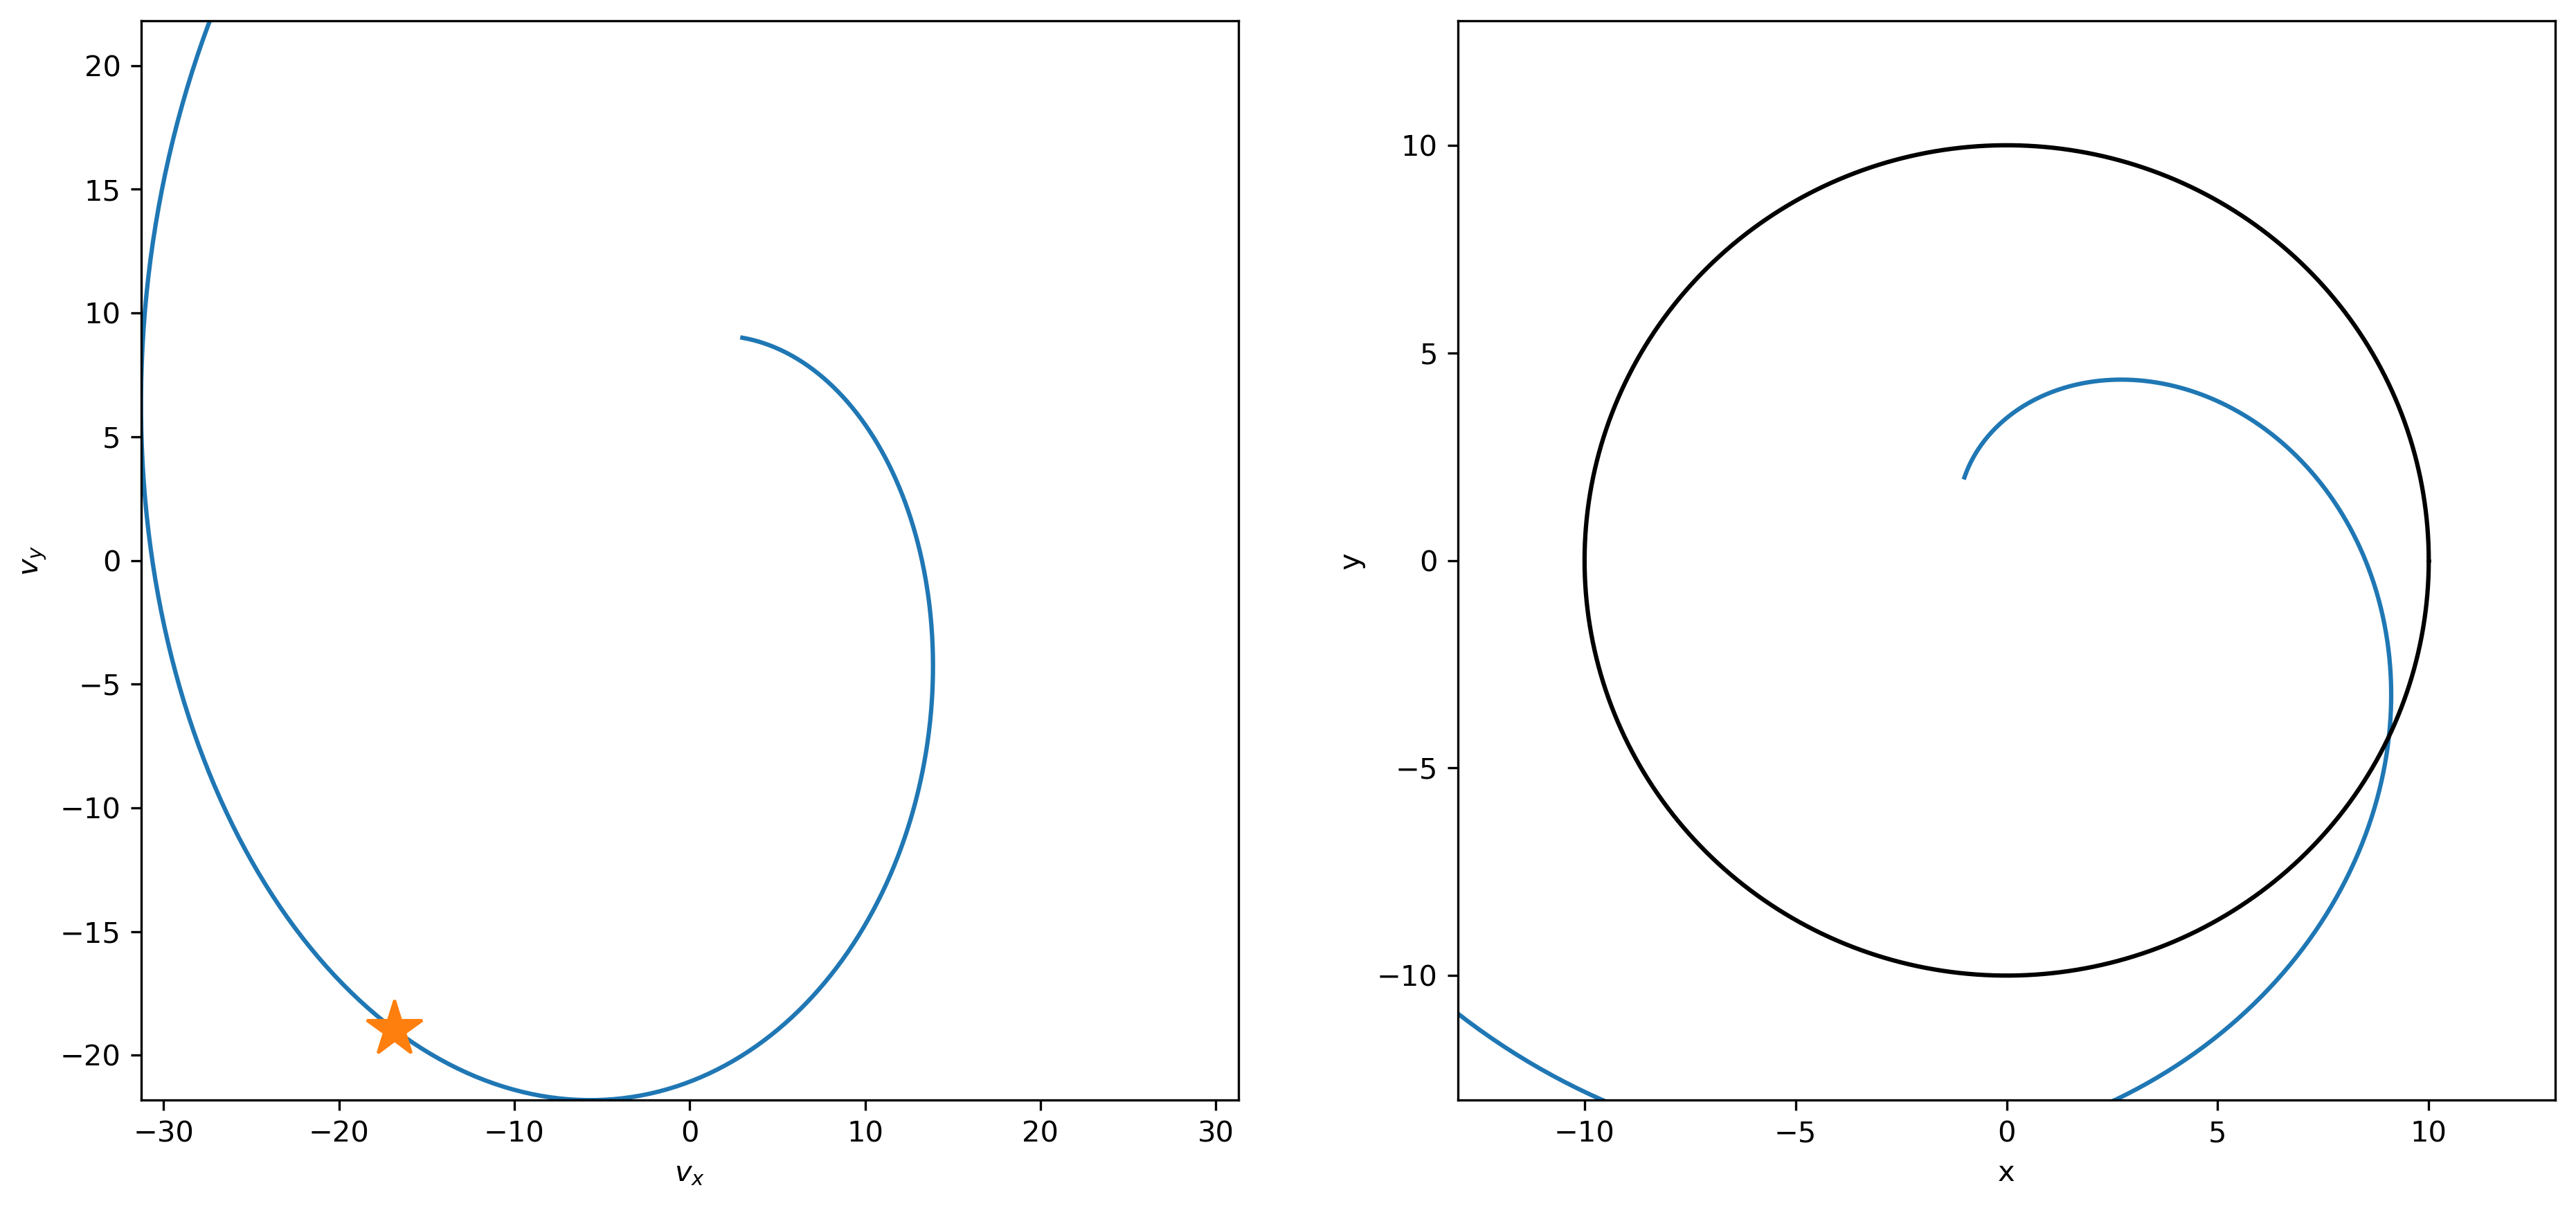

In [28]:
from sympy.abc import t
### LET'S DEFINE SOME VARIABLES
omega = 2 #ANGULAR VELOCITY
r0 = [3,9,-1,2] #INITIAL POSITION
a = np.arange(0,200,0.01) #INDEPENDENT VARIABLE INITIALIZATION

### THE REST WILL ALL RUN PROVIDED THE ABOVE CELLS AND THE ONE BELOW HAVE BEEN RAN, NO OTHER INPUT NEEDED
xd = eA[0,0]*r0[0] + eA[0,1]*r0[1] + eA[0,2]*r0[2] + eA[0,3]*r0[3]
xd = xd.replace(w, omega)
yd = eA[1,0]*r0[0] + eA[1,1]*r0[1] + eA[1,2]*r0[2] + eA[1,3]*r0[3]
yd = yd.replace(w, omega)
x = eA[2,0]*r0[0] + eA[2,1]*r0[1] + eA[2,2]*r0[2] + eA[2,3]*r0[3]
x = x.replace(w, omega)
y = eA[3,0]*r0[0] + eA[3,1]*r0[1] + eA[3,2]*r0[2] + eA[3,3]*r0[3]
y = y.replace(w, omega)
lam_xd = sp.lambdify(t, xd, 'numpy')
lam_yd = sp.lambdify(t, yd, 'numpy')
lam_x = sp.lambdify(t, x, 'numpy')
lam_y = sp.lambdify(t, y, 'numpy')
xdt = lam_xd(a)
ydt = lam_yd(a)
xt = lam_x(a)
yt = lam_y(a)

lims = limits(a, xt, yt, xdt, ydt)
fallpoint = felloff(a, xt, yt, xdt, ydt)
lims
fallpoint
fig = plt.figure(figsize=(15,6.75), dpi=300)
ax0 = fig.add_subplot(1, 2, 1, xlabel='$v_x$', ylabel='$v_y$', xlim = (-lims[0], lims[0]), ylim = (-lims[1],lims[1]))
ax0.plot(xdt, ydt)
ax0.plot(fallpoint[0], fallpoint[1], marker='*', markersize=20)
ax1 = fig.add_subplot(1, 2, 2, xlabel='x', ylabel='y', xlim = (-13, 13), ylim = (-13,13))
ax1.plot(xt, yt)
s = np.arange(0,2*np.pi, 0.01)
x = 10*np.cos(s)
y = 10*np.sin(s)
ax1.plot(x, y, color='black')

The limits of the velocity phase portrait, on the left, are automatically set by the limits funtion below to be the maximum value that $v_x$ and $v_y$ reach before the position coordinates independently reach the limits of the position plot, which are set to $\pm13$.
\
\
The yellow/orange star marker on the velocity phase portrait marks the point at which the position vector has reached the edge of the merry-go-round.

In [27]:
def limits (t, x, y, xd, yd):
    count = range(len(t))
    breaker = [0,0]
    xmax = abs(xd[0])
    ymax = abs(yd[0])
    for i in count:
        if breaker[0] == 0 and abs(xd[i]) >= xmax:
            xmax = abs(xd[i])
        if breaker[1] == 0 and abs(yd[i]) >= ymax:
            ymax = abs(yd[i])
        if breaker[0] == 0 and (x[i] >= 13 or x[i] <= -13):
            breaker[0] += 1
        if breaker[1] == 0 and (y[i] >= 13 or y[i] <= -13):
            breaker[1] += 1
        if breaker == [1,1]:
            break
    return xmax, ymax

def felloff (t, x, y, xd, yd):
    count = range(len(t))
    breaker = 0
    for i in count:
        if breaker == 0 and (x[i] >= 10 or x[i] <= -10):
            xp = xd[i]
            yp = yd[i]
            breaker += 1
        if breaker == 0 and (y[i] >= 10 or y[i] <= -10):
            xp = xd[i]
            yp = yd[i]
            breaker += 1
        if breaker == 1:
            break
    if breaker == 0:
        return 0, 0
    return xp, yp

# Runge Kutta fourth order

The following four functions represent the dynamical system

In [29]:
def f1(x1, x2, x3, x4):
    f1 = 2*w*x2+w**2*x3
    return f1

def f2(x1, x2, x3, x4):
    f2 = -2*w*x1+w**2*x4
    return f2

def f3(x1, x2, x3, x4):
    f3 = x1
    return f3

def f4(x1, x2, x3, x4):
    f4 = x2
    return f4

Below is the Runge Kutta algorithm. This can be manipulated to accomodate arbitrary sized first order differential systems of equations.

In [30]:
def RK(t, h):

    f = [f1, f2, f3, f4] #FUNCTIONS AS DEFINED ABOVE
    
    k1 = [0,0,0,0] #THESE HOLD THE STATE VARIABLE VALUES FOR EACH STEP
    k2 = [0,0,0,0]
    k3 = [0,0,0,0]
    k4 = [0,0,0,0]
    
    x1 = [x0[0]] #STATE VARIABLE ARRAYS
    x2 = [x0[1]]
    x3 = [x0[2]]
    x4 = [x0[3]]

    p = 0 #COUNTER VARIABLES
    q = 0
    
    for i in t:
        for j in f:
            k1[q] = j(x1[p], x2[p], x3[p], x4[p])
            q+=1
        q = 0
        for j in f:
            k2[q] = j(x1[p]+(h/2)*k1[0], x2[p]+(h/2)*k1[1], x3[p]+(h/2)*k1[2], x4[p]+(h/2)*k1[3])
            q+=1
        q = 0
        for j in f:
            k3[q] = j(x1[p]+(h/2)*k2[0], x2[p]+(h/2)*k2[1], x3[p]+(h/2)*k2[2], x4[p]+(h/2)*k2[3])
            q+=1
        q = 0
        for j in f:
            k4[q] = j(x1[p]+h*k3[0], x2[p]+h*k3[1], x3[p]+h*k3[2], x4[p]+h*k3[3])
            q+=1
        q = 0
        if p==len(t)-1: break
        
        x1.append(x1[p]+(h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0]))
        x2.append(x2[p]+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]))
        x3.append(x3[p]+(h/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2]))
        x4.append(x4[p]+(h/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3]))
        
        p+=1
    return x1, x2, x3, x4

The next three cells can be run to generate some plots in the time domain, and to assemble them into phase portraits. Skip down below to use one shot cells that plot phase portraits. WARNING - generating too many data points in the independent variable array can result in massive computation times. I don't recommend more than ~10^4 samples, 10^6 takes over a min on my computer. 

In [212]:
w = 3 #angular velocity of the merry go round

x0 = np.zeros(4)
x0[0] = 0 # x component of initial velocity
x0[1] = 0 # y component of initial velocity
x0[2] = 1 # x initial position
x0[3] = 1 # y initial positon

h = 0.001
t = np.arange(0, 5, h)
gah = RK(t, h)

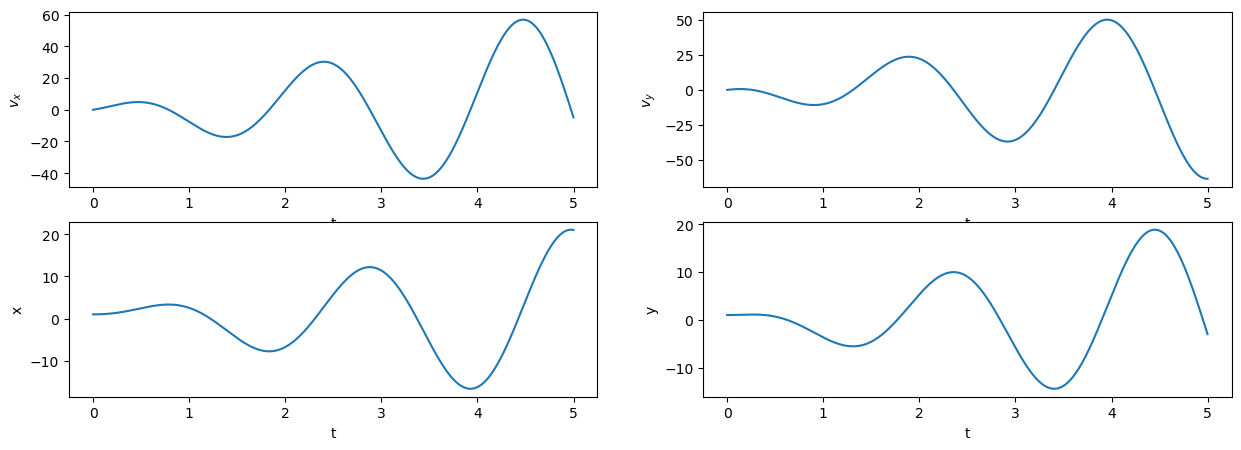

In [120]:
fig = plt.figure(figsize=(15,5))

ax0 = fig.add_subplot(2, 2, 1, xlabel='t', ylabel='$v_x$')
ax0.plot(t, gah[0])

ax1 = fig.add_subplot(2, 2, 2, xlabel='t', ylabel='$v_y$',)
ax1.plot(t, gah[1])

ax2 = fig.add_subplot(2, 2, 3, xlabel='t', ylabel='x',)
ax2.plot(t, gah[2])

ax3 = fig.add_subplot(2, 2, 4, xlabel='t', ylabel='y',)
ax3.plot(t, gah[3])

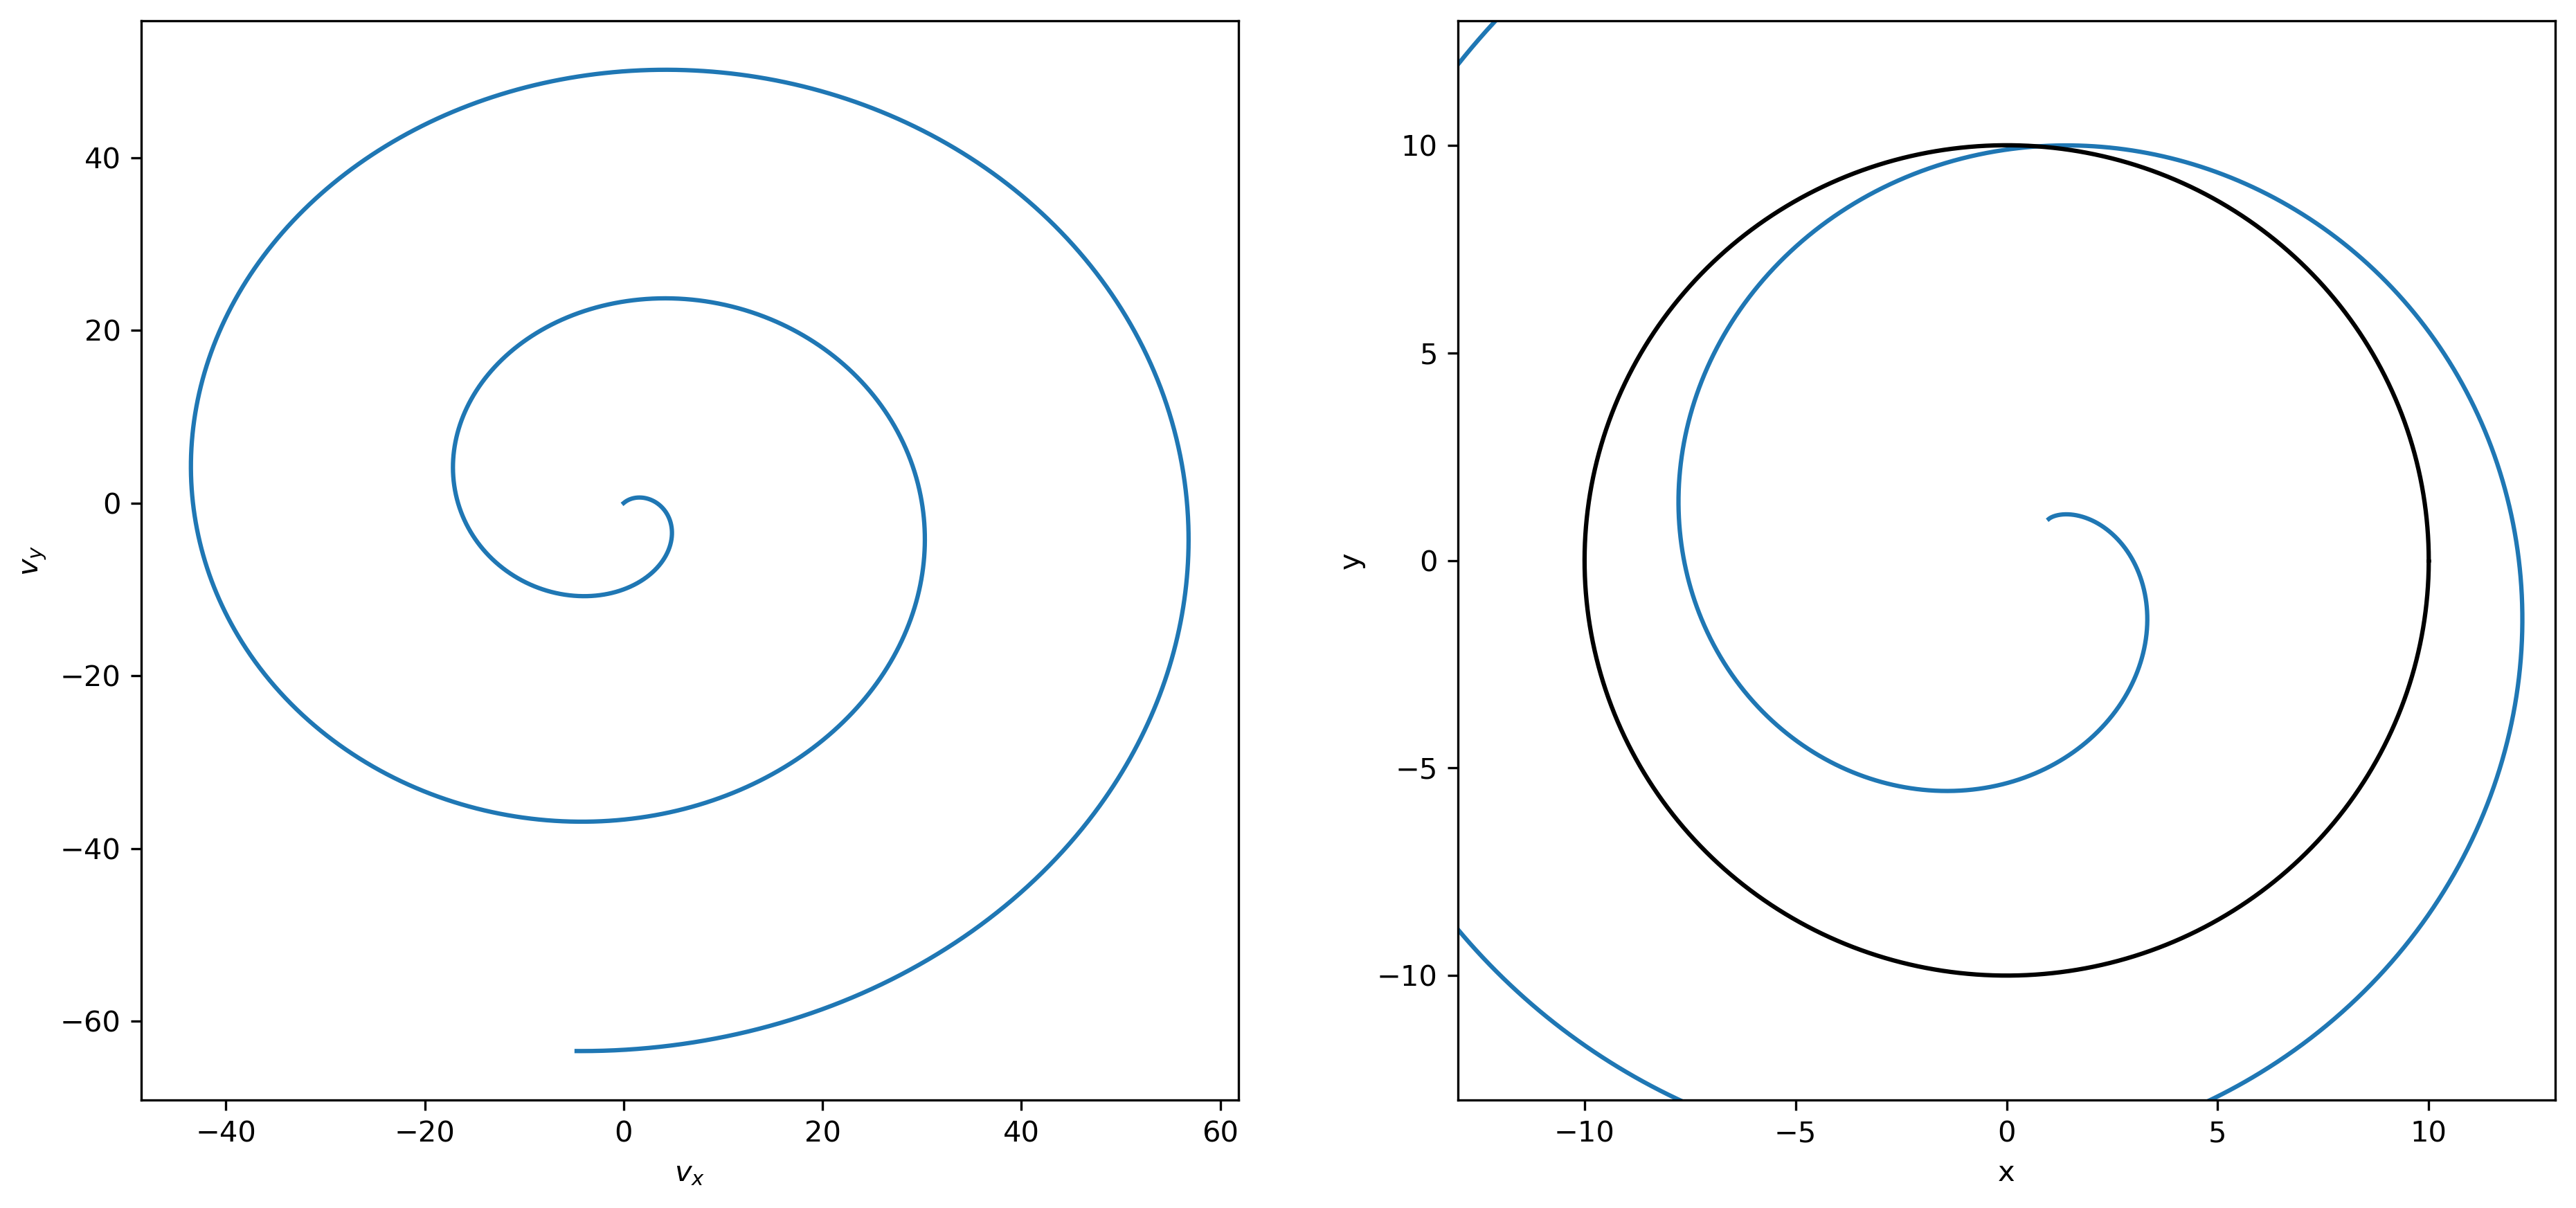

In [214]:
fig = plt.figure(figsize=(15,6.75), dpi=300)

ax0 = fig.add_subplot(1, 2, 1, xlabel='$v_x$', ylabel='$v_y$')
ax0.plot(gah[0], gah[1])

ax1 = fig.add_subplot(1, 2, 2, xlabel='x', ylabel='y', xlim = (-13, 13), ylim = (-13,13))
ax1.plot(gah[2], gah[3])
t = np.arange(0,2*np.pi, 0.01)
y = 10*np.sin(t)
x = 10*np.cos(t)
ax1.plot(x, y, color='black')

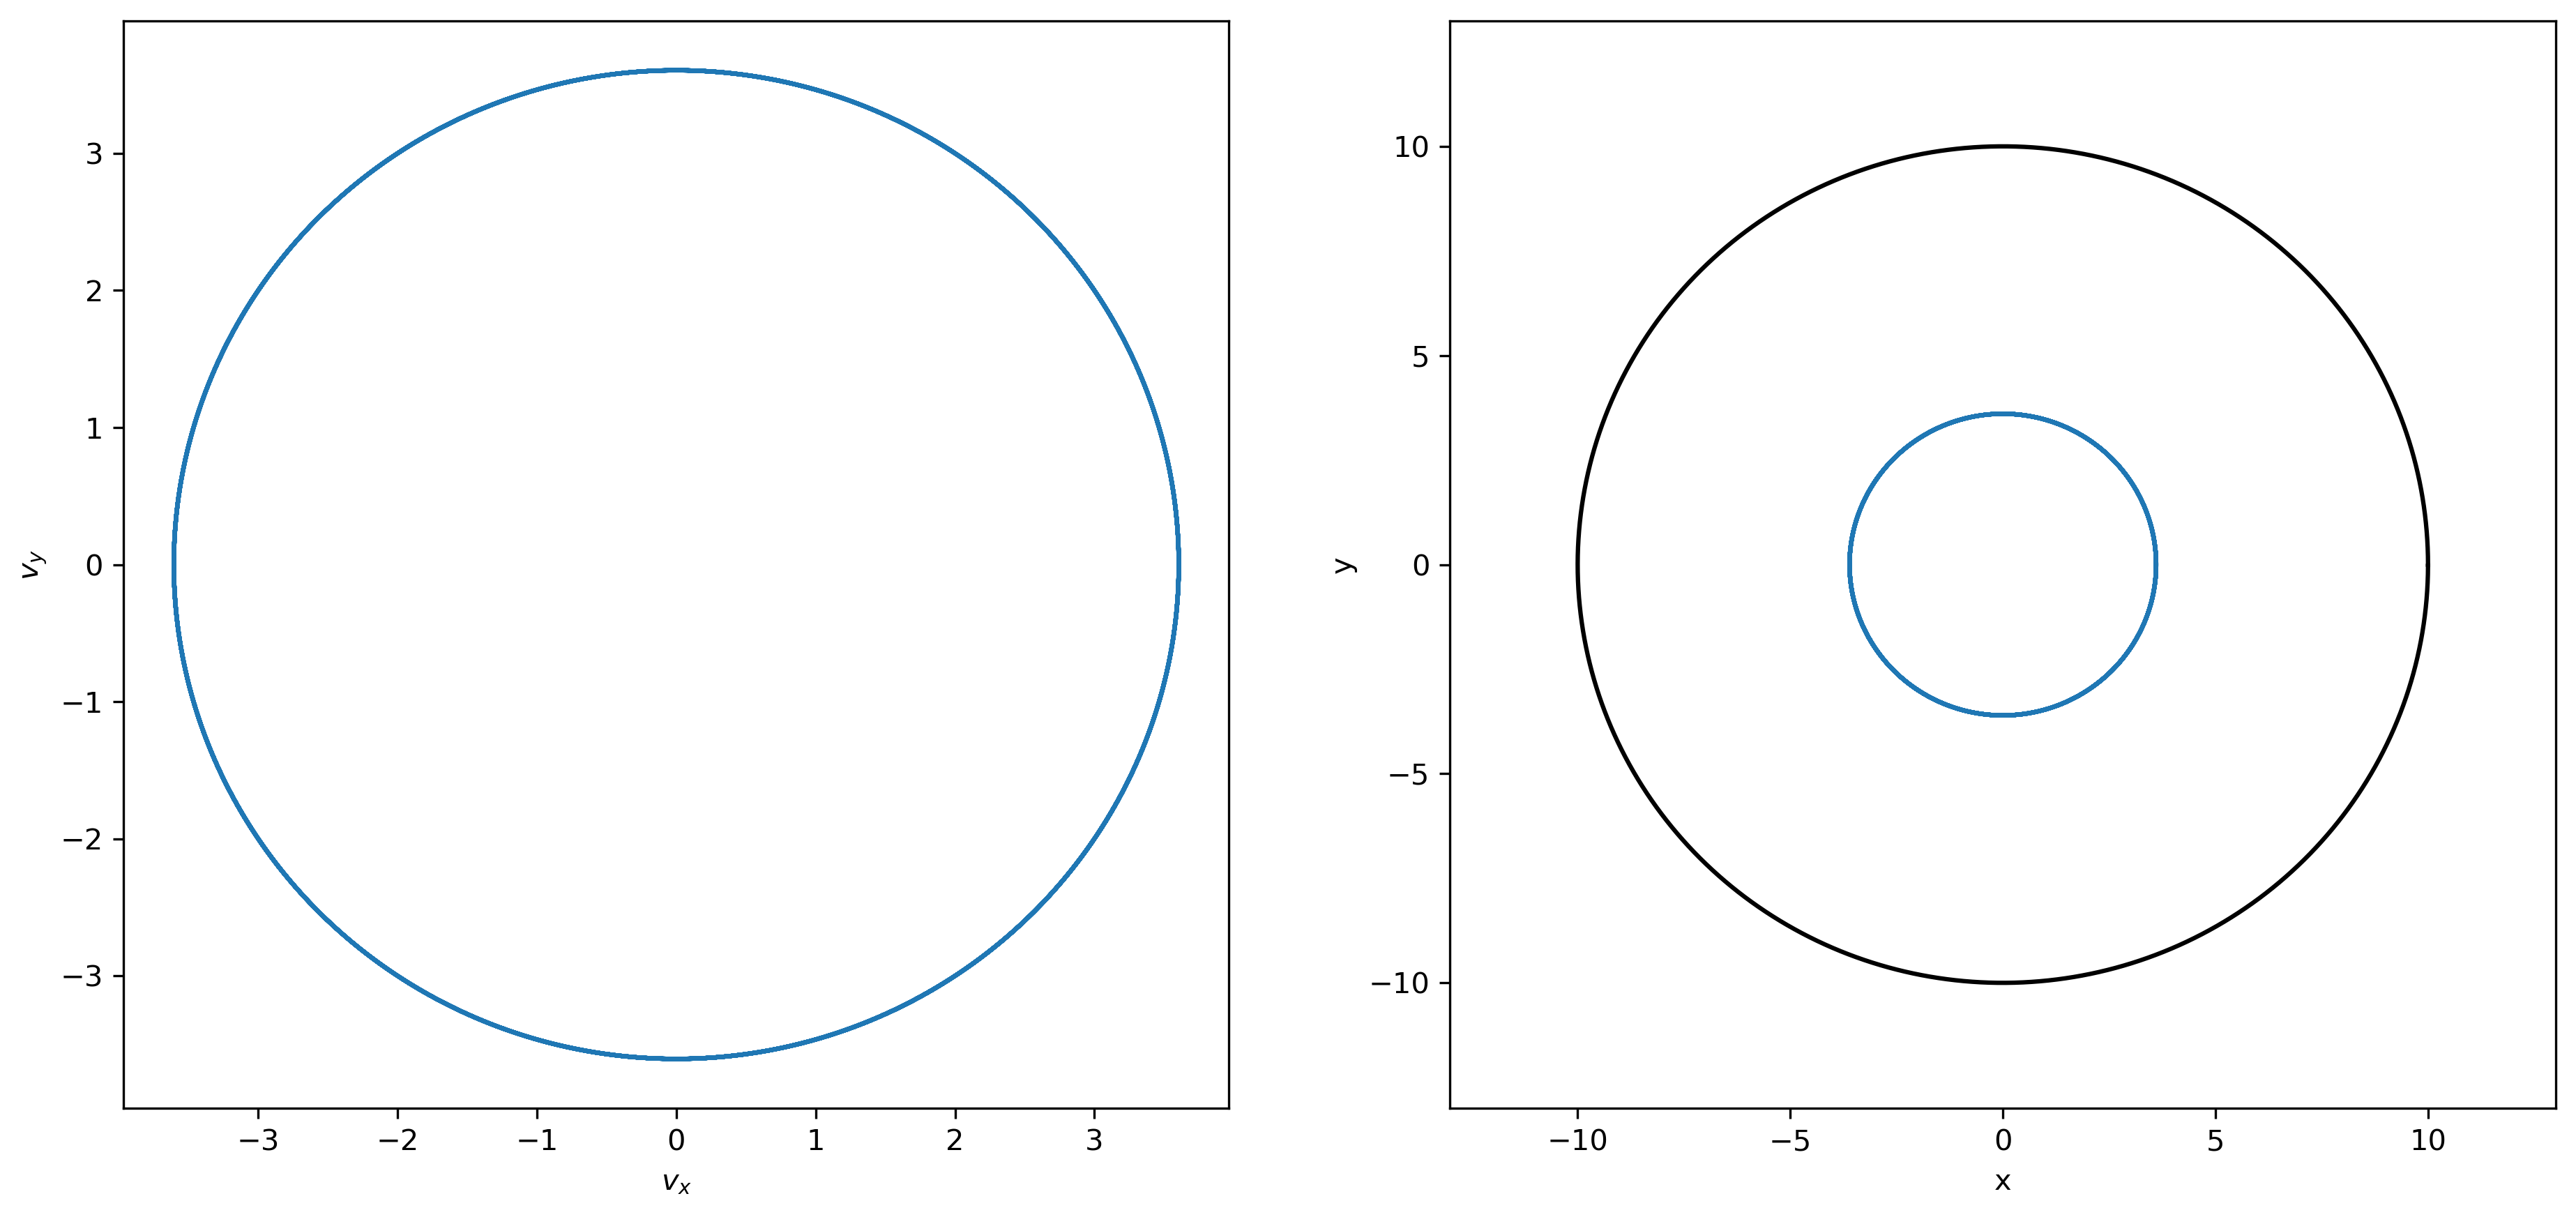

In [38]:
w = 1 #angular velocity of the merry go round

### INITIAL CONDITIONS [VX, VY, X, Y]
x0 = [2,3,-3,2] 

h = 0.001
t = np.arange(0, 50, h)
gah = RK(t, h)

fig = plt.figure(figsize=(15,6.75), dpi=300)

ax0 = fig.add_subplot(1, 2, 1, xlabel='$v_x$', ylabel='$v_y$')
ax0.plot(gah[0], gah[1])

ax1 = fig.add_subplot(1, 2, 2, xlabel='x', ylabel='y', xlim = (-13, 13), ylim = (-13,13))
ax1.plot(gah[2], gah[3])
t = np.arange(0,2*np.pi, 0.01)
y = 10*np.sin(t)
x = 10*np.cos(t)
ax1.plot(x, y, color='black')

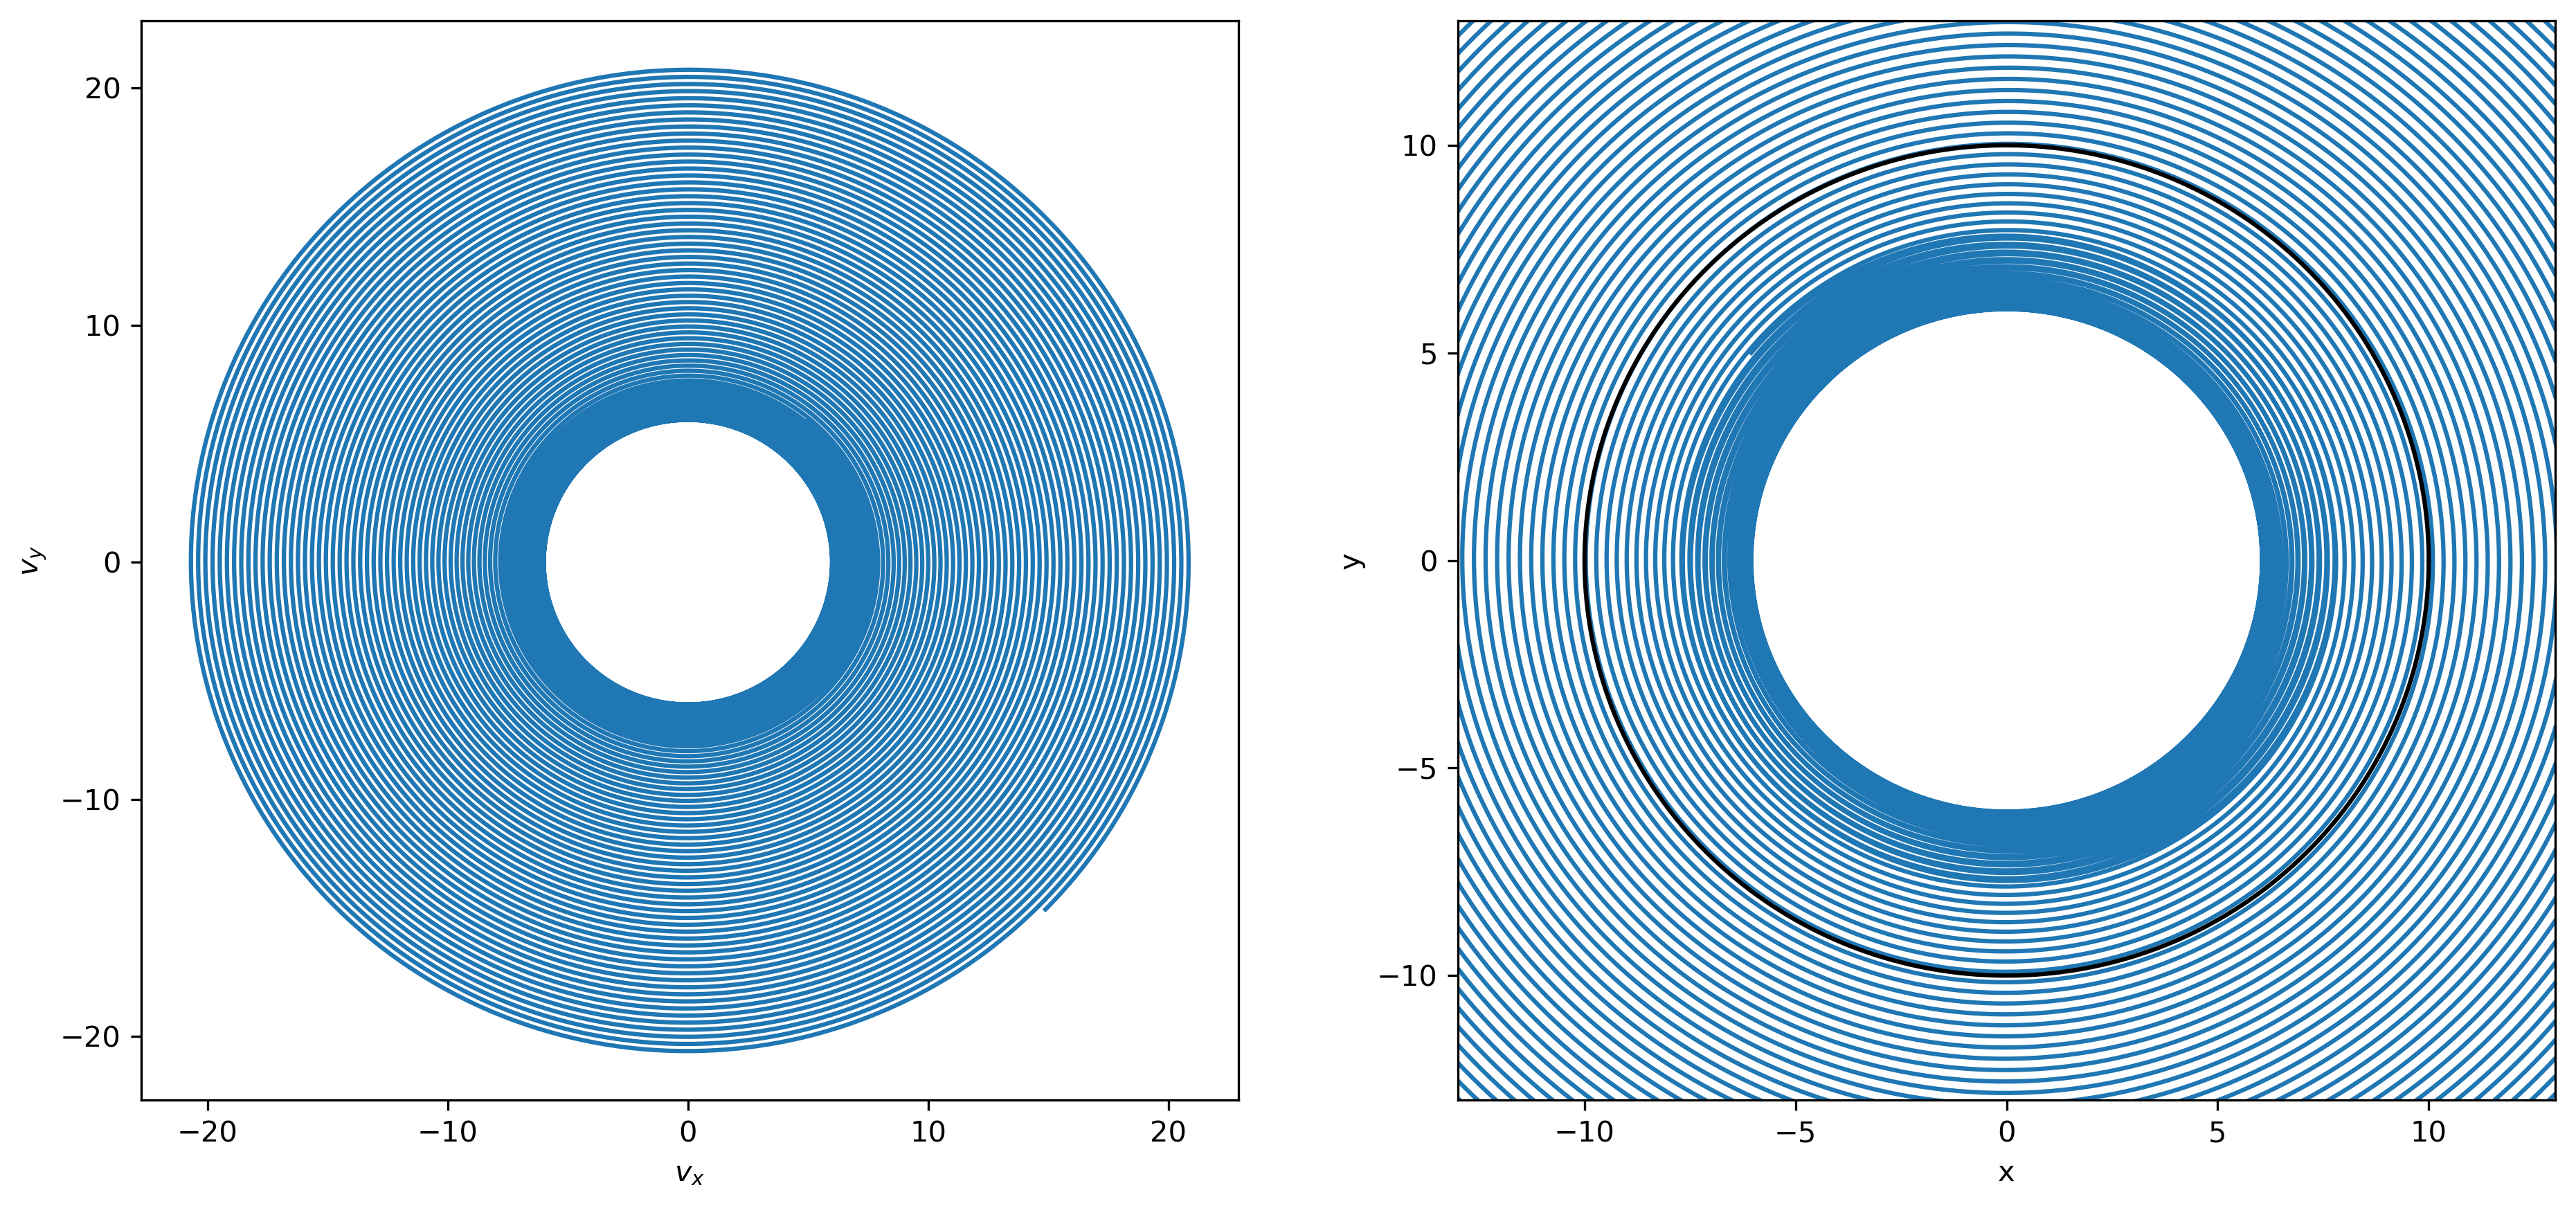

In [49]:
w = 1 #angular velocity of the merry go round

### INITIAL CONDITIONS [VX, VY, X, Y]
x0 = [5,6,-6.05,5] 

h = 0.001
t = np.arange(0, 500, h)
gah = RK(t, h)

fig = plt.figure(figsize=(15,6.75), dpi=300)

ax0 = fig.add_subplot(1, 2, 1, xlabel='$v_x$', ylabel='$v_y$')
ax0.plot(gah[0], gah[1])

ax1 = fig.add_subplot(1, 2, 2, xlabel='x', ylabel='y', xlim = (-13, 13), ylim = (-13,13))
ax1.plot(gah[2], gah[3])
t = np.arange(0,2*np.pi, 0.01)
y = 10*np.sin(t)
x = 10*np.cos(t)
ax1.plot(x, y, color='black')

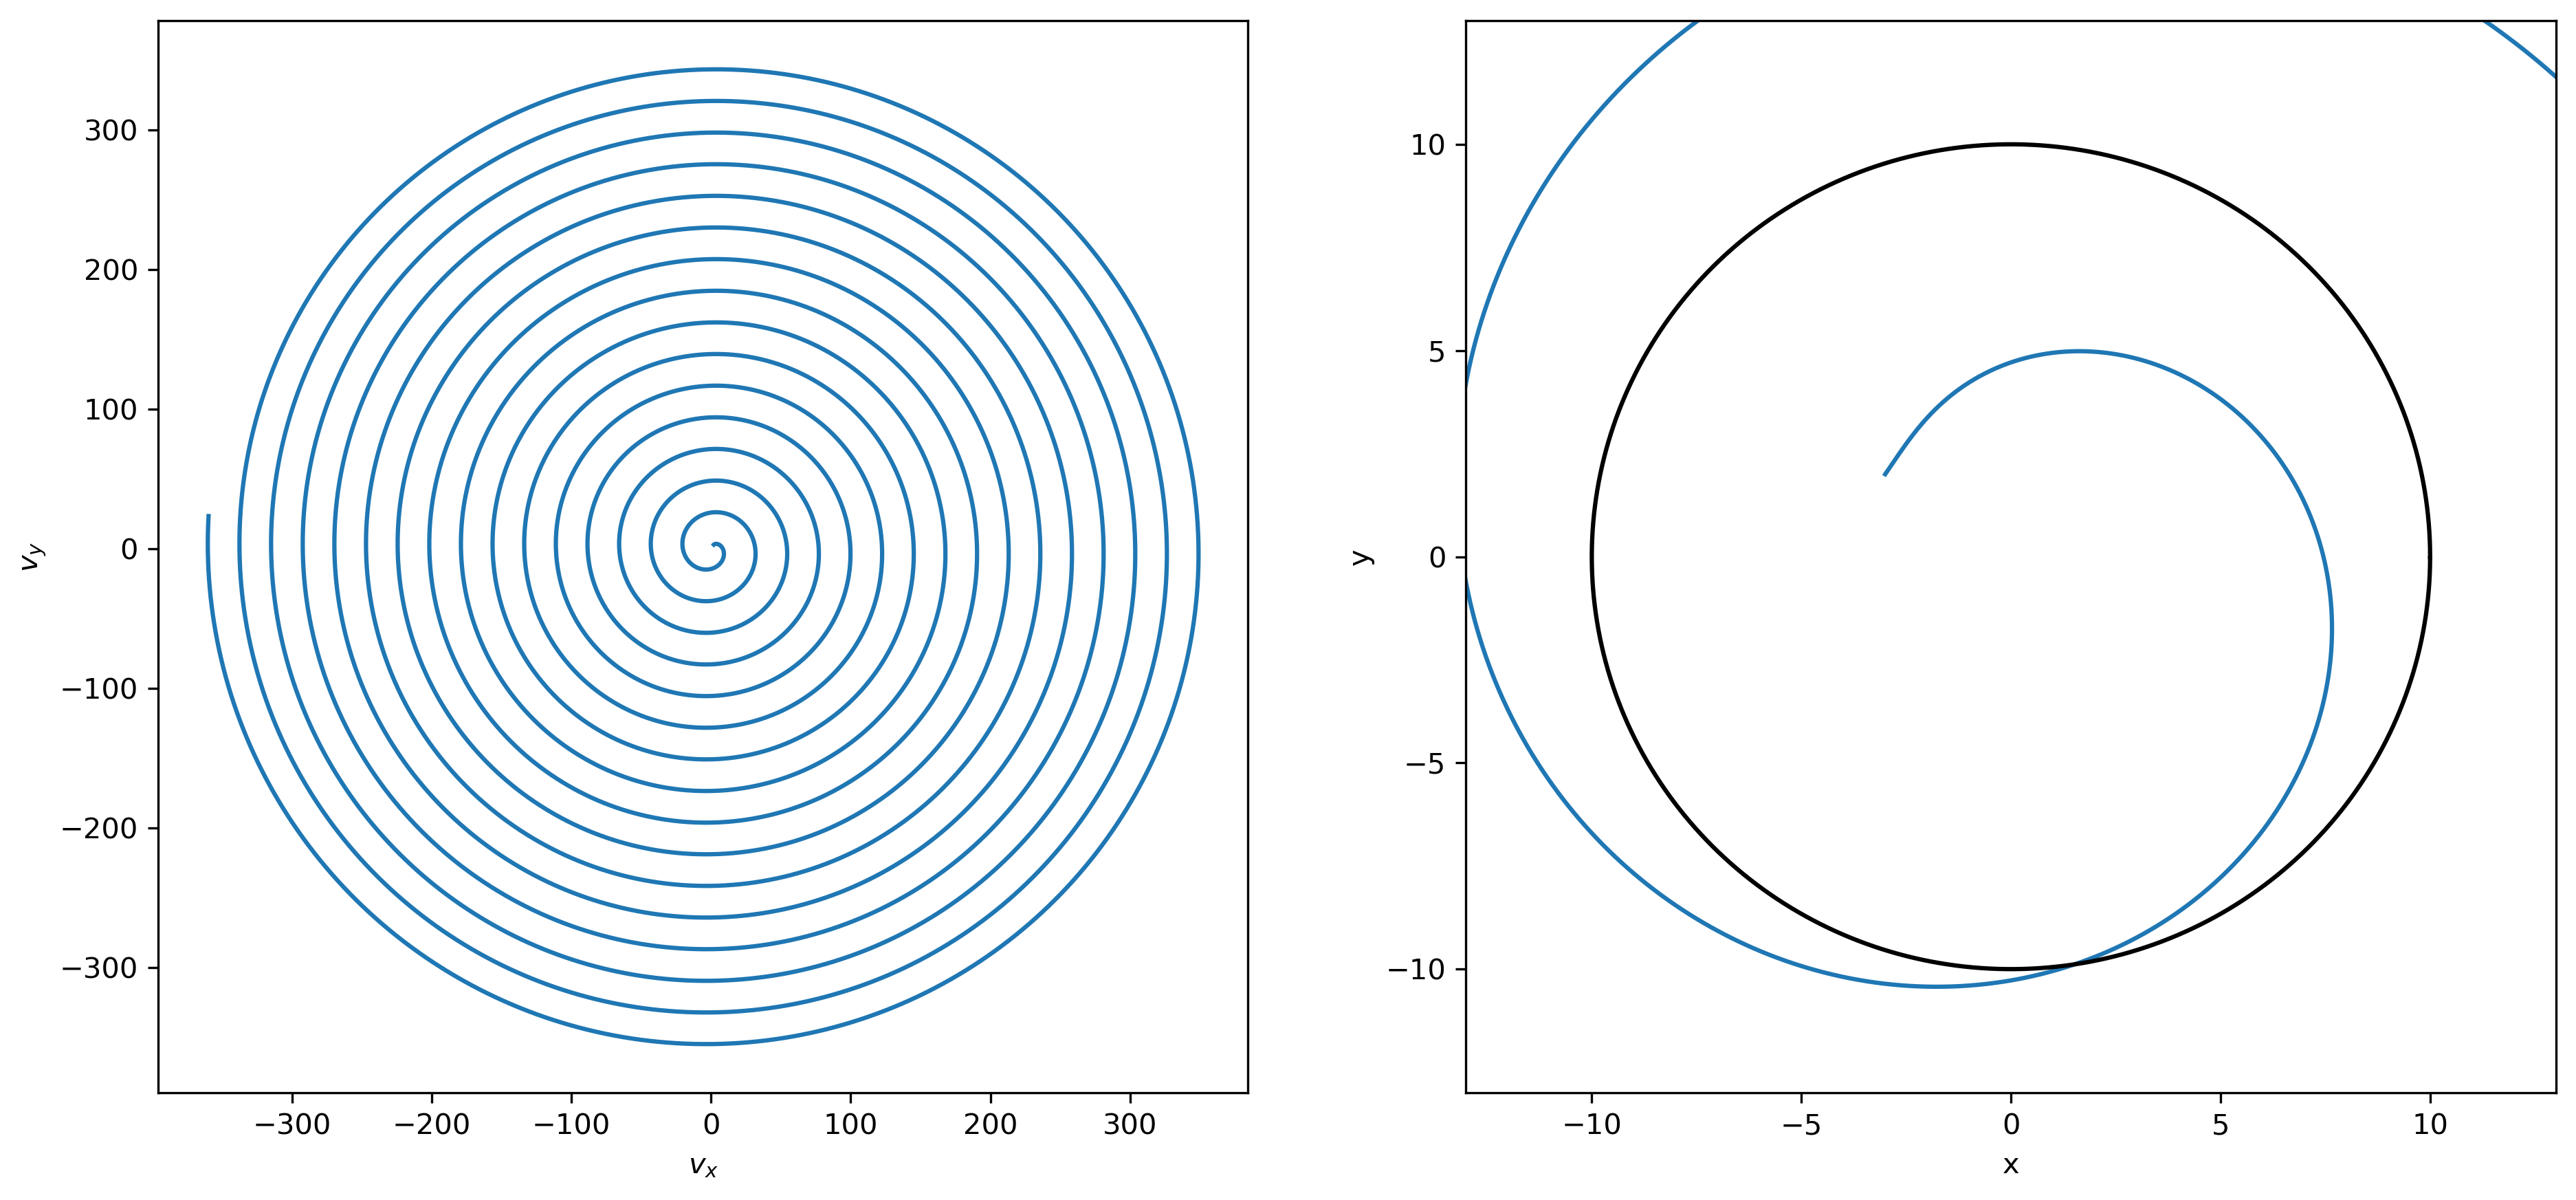

In [39]:
w = 2 #angular velocity of the merry go round

### INITIAL CONDITIONS [VX, VY, X, Y]
x0 = [2,3,-3,2] 

h = 0.001
t = np.arange(0, 50, h)
gah = RK(t, h)

fig = plt.figure(figsize=(15,6.75), dpi=300)

ax0 = fig.add_subplot(1, 2, 1, xlabel='$v_x$', ylabel='$v_y$')
ax0.plot(gah[0], gah[1])

ax1 = fig.add_subplot(1, 2, 2, xlabel='x', ylabel='y', xlim = (-13, 13), ylim = (-13,13))
ax1.plot(gah[2], gah[3])
t = np.arange(0,2*np.pi, 0.01)
y = 10*np.sin(t)
x = 10*np.cos(t)
ax1.plot(x, y, color='black')